In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [68]:
#importing the dataset
data=pd.read_csv('D:/bengaluru_house _price _prediction/Bengaluru_House_Data.csv')

In [69]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [70]:
data.shape

(13320, 9)

In [71]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [73]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [74]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [75]:
#drop unnesscessery columns
data=data.drop(['society','balcony','availability'],axis=1)

In [76]:
data.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [77]:
data.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [78]:
data=data.dropna()

In [79]:
data.shape

(13246, 6)

In [80]:
#create a separte bhk column
data['bhk']=data['size'].apply(lambda x:int(x.split(' ')[0]))

In [81]:
data.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [82]:
data=data.drop(['size'],axis=1)

In [83]:
data.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [84]:
#chceking for the unique values
data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [85]:
data['bhk'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

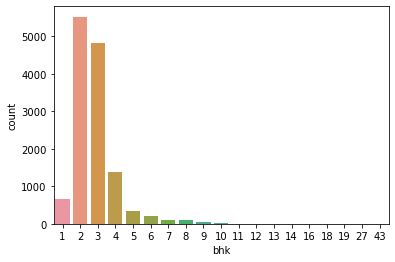

In [86]:
#visualize it with help of countplot
plt.figure()
sns.countplot(x=data['bhk'],data=data)
plt.show()

In [87]:
#chceking for the unique values
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [88]:
data['bath'].value_counts()

2.0     6908
3.0     3285
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

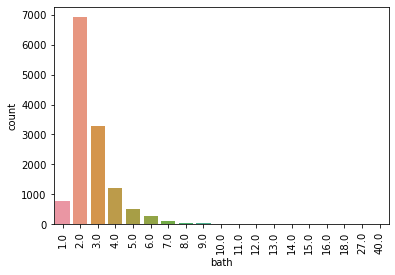

In [89]:
#visualize it with help of countplot
plt.figure()
sns.countplot(x=data['bath'],data=data)
plt.xticks(rotation=90)
plt.show()

In [90]:
#chceking for the total sqft column
data.dtypes

area_type      object
location       object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

so we have to findout the reason of object data type for the total_sqft column

In [91]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [92]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [93]:
data[~data['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,445.000,4


Some of the values of total_sqft are not integer or exact values but a range is given. 
Therefore we take the average pf the maximum and minimum value of the range.
For 410th sample we can see that the total_sqft is given in sq.meter

In [94]:
#converting the range into exact values
def range_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
        return float(x)
    except:
        return None

In [95]:
data1=data.copy()
data1['total_sqft']=data1['total_sqft'].apply(range_to_num)
data1=data1[data1['total_sqft'].notnull()]

In [96]:
data1['total_sqft'].isnull().sum()

0

In [97]:
#adding new feature price per sqft
data2=data1.copy()
data2['price_per_sqft']=round(data2['price']*100000/data2['total_sqft'],2)
data2.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.00


In [98]:
#working with locations
len(data2['location'].unique())

1298

In [99]:
#creating a separte df for locations
data2['location']=data2['location'].apply(lambda x:x.strip())
location_data=data2['location'].value_counts(ascending=False)
location_data

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

Now as we can see there are high number of locations in the dataset so we try to reduce it 

In [100]:
len(location_data)

1287

In [101]:
location_data.values.sum()

13200

In [102]:
len(location_data[location_data>10])

240

Locations with less than 10 data points are considered as "other" in location which later helps while using one hot encoding to have fewer dummy columns.

In [103]:
location_under_10=location_data[location_data<=10]
location_under_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [104]:
data2['location']=data2['location'].apply(lambda x: 'other' if x in location_under_10 else x)
len(data2['location'].unique())

241

In [105]:
data2.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.00


In [106]:
#outlier removal
len(data2[data2['total_sqft']/data2['bhk']<=200])

446

In [107]:
data3=data2[~(data2['total_sqft']/data2['bhk']<=200)]
data3.shape

(12754, 7)

we calculate this using a bussiness logic which is usually standard bedrooms sqft is 200 sqft so we removed the bedrooms which are less than 200.

<AxesSubplot:>

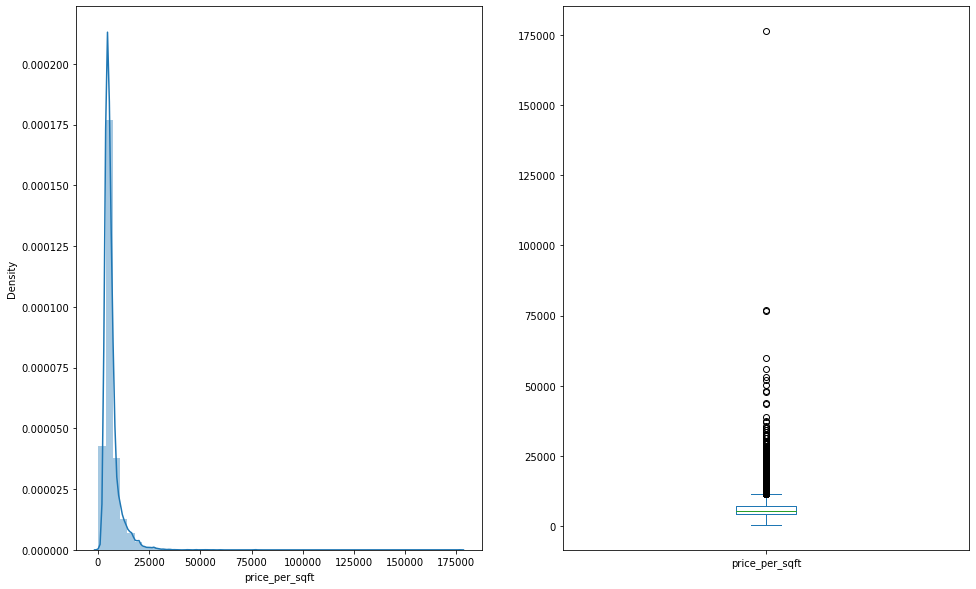

In [108]:
#outlier treatment for the price per sqft
plt.figure(1),
plt.subplot(121)
sns.distplot(data3['price_per_sqft'])
plt.subplot(122)
data3['price_per_sqft'].plot.box(figsize=(16,10))

In [109]:
data3['price_per_sqft'].describe()

count     12754.000000
mean       6432.965125
std        4285.219063
min         267.830000
25%        4230.770000
50%        5333.330000
75%        7036.785000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [110]:
def remove_outliers(df):
    df_o=pd.DataFrame()
    for key,subf in df.groupby('location'):
        mean=np.mean(subf['price_per_sqft'])
        std=np.std(subf['price_per_sqft'])
        reduced=subf[(subf['price_per_sqft']>(mean-std)) & (subf['price_per_sqft']<=(mean+std))]
        df_o=pd.concat([df_o,reduced],ignore_index=True)
    return df_o


In [111]:
data4=remove_outliers(data3)
data4.shape

(10550, 7)

In [112]:
data4['price_per_sqft'].describe()

count    10550.000000
mean      5720.674972
std       2362.105133
min       1250.000000
25%       4250.000000
50%       5199.390000
75%       6500.000000
max      24509.800000
Name: price_per_sqft, dtype: float64

In [113]:
def scatter_plot(df,location):
    bhk_2=df[(df['location']==location)&(df['bhk']==2)]
    bhk_3=df[(df['location']==location)& (df['bhk']==3)]
    plt.scatter(bhk_2['total_sqft'],bhk_2['price'],color='red',label='2 BHK',s=50)
    plt.scatter(bhk_3['total_sqft'],bhk_3['price'],color='green',label='3 BHK',s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("Price(INR)")
    plt.title(location)
    plt.legend()

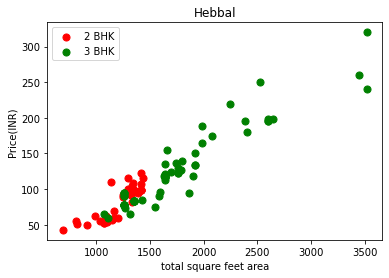

In [114]:
scatter_plot(data4,"Hebbal")

We can see that in the same location a 2bhk house costs more than a 3bhk house with the same area. So, we create a dictionary of statistics per bhk and remove those 2bhk houses where the price_per_sqft is less than the mean price_per_sqft of 1bhk house

In [115]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df['price_per_sqft']),
                'std':np.std(bhk_df['price_per_sqft']),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [116]:
data5=remove_bhk_outlier(data4)
data5.shape

(7523, 7)

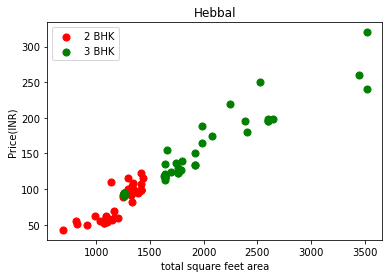

In [117]:
scatter_plot(data5,"Hebbal")

In [118]:
#Outlier treatment using Bathrooms Feature
data5.bath.unique()

array([ 4.,  3.,  2.,  5.,  6.,  1.,  8.,  7.,  9., 12., 10., 27., 16.,
       13.])

In [119]:
data5[data5['bath']>10]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
5435,Super built-up Area,Neeladri Nagar,4000.0,12.0,160.0,10,4000.00
8482,Super built-up Area,other,8000.0,27.0,230.0,27,2875.00
8728,Super built-up Area,other,12000.0,12.0,525.0,10,4375.00
8817,Super built-up Area,other,10000.0,16.0,550.0,16,5500.00
9581,Super built-up Area,other,6000.0,12.0,150.0,11,2500.00
9917,Super built-up Area,other,5425.0,13.0,275.0,13,5069.12


As it is uncommon to have 2 more bathrooms than the bedrooms in a house we remove those datapoints

In [120]:
data5[data5.bath>data5.bhk+2]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
1573,Plot Area,Chamrajpet,1500.0,9.0,230.0,6,15333.33
1709,Built-up Area,Chikkabanavar,2460.0,7.0,80.0,4,3252.03
5395,Built-up Area,Nagasandra,7000.0,8.0,450.0,4,6428.57
6903,Super built-up Area,Thanisandra,1806.0,6.0,116.0,3,6423.03
8651,Super built-up Area,other,11338.0,9.0,1000.0,6,8819.90


In [121]:
data6=data5[data5.bath<data5.bhk+2]
data6.shape

(7443, 7)

In [122]:
data6['bath'].value_counts()

2.0     4236
3.0     1803
1.0      596
4.0      548
5.0      174
6.0       46
8.0       14
7.0       14
9.0        7
10.0       1
27.0       1
16.0       1
12.0       1
13.0       1
Name: bath, dtype: int64

In [123]:
data7=data6.drop(['area_type','price_per_sqft'],axis='columns')
data7.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [124]:
#encoding location with help of one hot encoding
loc_dummies=pd.get_dummies(data7['location'])
loc_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
#joining two dataframes
data8=pd.concat([data7,loc_dummies],axis=1)
data8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
data9=data8.drop('location',axis=1)
data9.shape

(7443, 245)

In [127]:
#constructing X and y
X=data9.drop(['price'],axis=1)
X.shape

(7443, 244)

In [128]:
Y=data9['price']
Y.shape

(7443,)

# Modeling

In [149]:
#import the important libraies
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [130]:
#scale the data of the traning data set
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X)

# transform train and test sets
X_scaled = scaler.transform(X)


In [131]:
#split in train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5954, 244), (1489, 244))

In [135]:
#linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.8406105077955657

In [136]:
#using kfold cross validation
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(lr,X,Y,cv=cv)

array([0.82235549, 0.79086326, 0.83380753, 0.87070592, 0.83531223])

In [148]:
#lasso and Ridge regression
lasso=Lasso()
lasso.fit(X_train,Y_train)
lasso.score(X_test,Y_test)

0.7499536451659294

In [157]:
ridge=Ridge()
ridge.fit(X_train,Y_train)
ridge.score(X_test,Y_test)

0.8420658258645284

In [147]:
#Using gridsearchcv try to find out best model with best parameters
def find_best_model(X,Y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[np.arange(0.00, 1.0, 0.1).all()],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_parameter':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_parameter'])
find_best_model(X,Y)

,model,best_score,best_parameter
0,linear_regression,0.830609,{'normalize': False}
1,lasso,0.830614,"{'alpha': False, 'selection': 'random'}"
2,decision_tree,0.764097,"{'criterion': 'mse', 'splitter': 'best'}"


In [158]:
#enssemble techniques
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
# ensembles
ensembles = []
kfold = KFold(n_splits=5)
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),
                                        ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),
                                         ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),
                                        ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),
                                        ('ET', ExtraTreesRegressor())])))

for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    print(f'{name} = {cv_results.mean()}')

ScaledAB = 0.6588476734260817
ScaledGBM = 0.8309721246385205
ScaledRF = 0.8386165235387615
ScaledET = 0.8457128997749207


In [159]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [160]:
predict_price('Hebbal',1200,3,3)

89.13290423834752

In [161]:
#Export the tested model
import pickle
with open('bengaluru_house_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [162]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))